### Жеглов Глеб 
#### 19-ИВТ-2
### Вариант 11 
#### 1 | 2, 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc, plot_precision_recall_curve, plot_roc_curve
import warnings
warnings.simplefilter('ignore')


In [2]:
test = pd.read_csv("test.csv")
np.max(test["CLASS"])

9

In [3]:
testing = pd.read_csv("poker-hand-testing.csv")
print(testing)

        S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0        1   1   1  13   2   4   2   3   1  12      0
1        3  12   3   2   3  11   4   5   2   5      1
2        1   9   4   6   1   4   3   2   3   9      1
3        1   4   3  13   2  13   2   1   3   6      1
4        3  10   2   7   1   2   2  11   4   9      0
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
999995   3   1   1  12   2   9   4   9   2   6      1
999996   3   3   4   5   2   7   1   4   4   3      1
999997   1  11   4   7   3   9   1  13   2   7      1
999998   3  11   1   8   1   1   3  13   2   8      1
999999   2   5   2   9   4   9   2   3   3   3      2

[1000000 rows x 11 columns]


In [4]:
training = pd.read_csv("poker-hand-training-true.csv")
print(training)

       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0       1  10   1  11   1  13   1  12   1   1      9
1       2  11   2  13   2  10   2  12   2   1      9
2       3  12   3  11   3  13   3  10   3   1      9
3       4  10   4  11   4   1   4  13   4  12      9
4       4   1   4  13   4  12   4  11   4  10      9
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
25005   3   9   2   6   4  11   4  12   2   4      0
25006   4   1   4  10   3  13   3   4   1  10      1
25007   2   1   2  10   4   4   4   1   4  13      1
25008   2  12   4   3   1  10   1  12   4   9      1
25009   1   7   3  11   3   3   4   8   3   7      1

[25010 rows x 11 columns]


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных.
#### Информация об атрибутах:
**S1** - "Масть первой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

**C1** - "Ранг первой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

**S2** - "Масть второй карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

**C2** - "Ранг второй карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

**S3** - "Масть третьей карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

**C3** - "Ранг третьей карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

**S4** - "Масть четвертой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

**C4** - "Ранг четвертой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

**S5** - "Масть пятой карты". Порядковый номер (1-4), соответствующий (Червы, Пики, Бубны, Трефы)

**C5** - "Ранг пятой карты". Числовое (1-13) представление (Туз, 2, 3, ... , Дама, Король)

**CLASS** "Покерная рука". Порядковый номер (0-9)

0. Старшая карта; не распознанная покерная рука
1. Пара; две карты одного достоинства 
2. Две пары; две пары карт одного достоинства
3. Сет; три карты одного достоинства
4. Стрит; пять последовательно расположенных карт
5. Флеш; пять карт одной масти
6. Фулл хаус; три карты одного достоинства и две карты другого 
7. Каре; четыре карты одного достоинства
8. Стрит флеш; стрит, в котором все пять карт одномастные
9. Флеш рояль; стрит флеш от десятки до туза

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [5]:
total = pd.concat([testing, training])
print(total)

       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0       1   1   1  13   2   4   2   3   1  12      0
1       3  12   3   2   3  11   4   5   2   5      1
2       1   9   4   6   1   4   3   2   3   9      1
3       1   4   3  13   2  13   2   1   3   6      1
4       3  10   2   7   1   2   2  11   4   9      0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
25005   3   9   2   6   4  11   4  12   2   4      0
25006   4   1   4  10   3  13   3   4   1  10      1
25007   2   1   2  10   4   4   4   1   4  13      1
25008   2  12   4   3   1  10   1  12   4   9      1
25009   1   7   3  11   3   3   4   8   3   7      1

[1025010 rows x 11 columns]


In [6]:
print(total.shape)

(1025010, 11)


In [7]:
total.drop_duplicates(inplace=True)
print(total.shape)

(1022771, 11)


Стёрто 2239 повторяющихся строк

### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

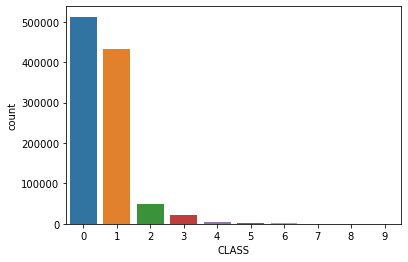

In [8]:
sns.countplot(x = 'CLASS', data = total)
plt.show()

На гисторграмме видно, что классы не сбалансированы, следовательно будем использовать PR-кривую

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию.

Выделяю категориальные и количественные(числовые) признаки

In [9]:
numerical_columns = [i for i in total.columns[0:11] if total[i].dtype.name != 'object']
categorial_columns = [i for i in total.columns[0:11] if total[i].dtype.name == 'object']

In [10]:
print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
categorial:  []


<AxesSubplot:>

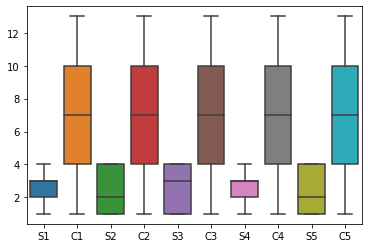

In [11]:
total_num = total.drop(columns = 'CLASS', axis = 1)
sns.boxplot(data = total_num)

Способ масштабирования - нормализация

<AxesSubplot:>

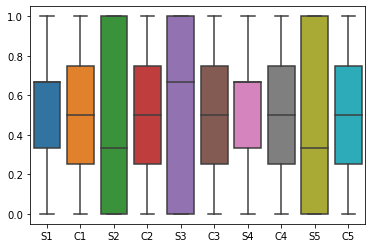

In [12]:
scaler = MinMaxScaler()
columns = total_num.columns
total_num[columns] = scaler.fit_transform(total_num[columns])
sns.boxplot(data = total_num)

### 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

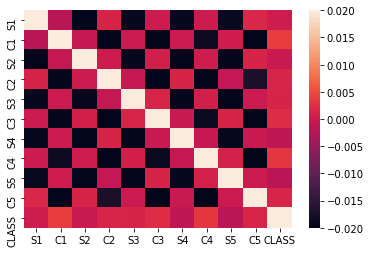

In [13]:
sns.heatmap(total.corr(), vmin = -0.02, vmax = 0.02)

In [14]:
total.corr()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
S1,1.000000,-0.001650,-0.021576,0.001395,-0.019326,0.000145,-0.019229,0.000109,-0.019076,0.001680,0.000261
C1,-0.001650,1.000000,-0.000598,-0.021307,-0.000155,-0.019565,-0.000086,-0.018635,0.000317,-0.020934,0.003888
S2,-0.021576,-0.000598,1.000000,0.000012,-0.019464,0.000774,-0.020514,0.000195,-0.020067,0.001375,-0.000309
C2,0.001395,-0.021307,0.000012,1.000000,-0.000513,-0.020950,0.001368,-0.020500,-0.000636,-0.017194,0.001552
S3,-0.019326,-0.000155,-0.019464,-0.000513,1.000000,0.001428,-0.019660,0.000680,-0.020807,-0.000111,0.001264
C3,0.000145,-0.019565,0.000774,-0.020950,0.001428,1.000000,-0.000263,-0.018915,0.001367,-0.020111,0.002228
S4,-0.019229,-0.000086,-0.020514,0.001368,-0.019660,-0.000263,1.000000,-0.000537,-0.019432,-0.000180,-0.001124
C4,0.000109,-0.018635,0.000195,-0.020500,0.000680,-0.018915,-0.000537,1.000000,0.000991,-0.020664,0.003213
S5,-0.019076,0.000317,-0.020067,-0.000636,-0.020807,0.001367,-0.019432,0.000991,1.000000,-0.000111,-0.001636
C5,0.001680,-0.020934,0.001375,-0.017194,-0.000111,-0.020111,-0.000180,-0.020664,-0.000111,1.000000,0.001476


### 7. Заполните пропущенные значения в данных;

In [15]:
total.shape

(1022771, 11)

In [16]:
total.count()

S1       1022771
C1       1022771
S2       1022771
C2       1022771
S3       1022771
C3       1022771
S4       1022771
C4       1022771
S5       1022771
C5       1022771
CLASS    1022771
dtype: int64

### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [17]:
# разделим полученные данные на данные для обучения и теста
x = test.drop('CLASS', axis = 1)
y = test['CLASS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(799, 10)
(200, 10)


**Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)**

In [18]:
rnc = RadiusNeighborsClassifier()
params = {'radius': np.arange(1, 100)}

rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(x_train, y_train)

best_radius = rnc_grid.best_estimator_.radius
best_accuracy = rnc_grid.best_score_

rnc = RadiusNeighborsClassifier(radius=best_radius)
rnc.fit(x_train, y_train)
pred = rnc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred))
print('Best Accuracy:', best_accuracy, ' at radius:', best_radius)

Accuracy: 0.5
Best Accuracy: 0.5218946540880502  at radius: 8


#### Многоклассовый классификатор

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

1. общие настройки, обучение и прогнозирование



In [20]:
n_classes = np.max(y)

Y = label_binarize(y, classes=[*range(n_classes)])

x_train, x_test, y_train, y_test = train_test_split(x,Y,random_state = 42)

clf = OneVsRestClassifier(RadiusNeighborsClassifier(8))
clf.fit(x_train, y_train)

y_score = clf.predict_proba(x_test)

2. кривая прецизионного отзыва



**PR-кривая**

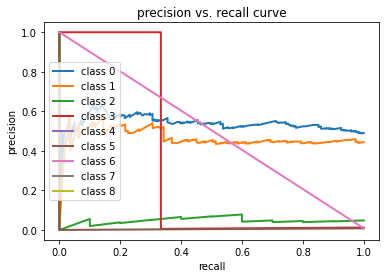

In [21]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Точность классификатора k-ближайших соседей составила 0,52. В многоклассовом классификаторе pr-кривая даёт оценку для 0, 1, 6 классов около 0,5 у остальных классов ниже. Следовательно никакой классификатор не смог решить свою задачу